Cleaning the test and train data set from Kaggle (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). As well as some EDA

Starting with loading the necessary packages


**Data Overview**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.rcsetup as rcsetup
import seaborn as sns
htrain = pd.read_csv("../Data/train.csv")
htest = pd.read_csv("../Data/test.csv")
#Machine-Learning-Project

In [2]:
#taking a look at the train data
htrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#taking a look at the test data
htest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [4]:
#shape of train and test
print(htest.shape)
htrain.shape

(1459, 80)


(1460, 81)

**First Visualization**

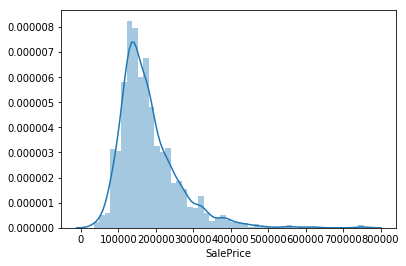

In [5]:
#histogram of sale prices shows that we need to normalize SalePricd
sns.distplot(htrain['SalePrice']);

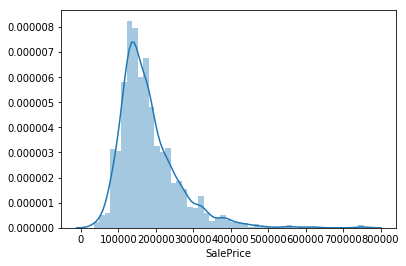

In [6]:
sns.distplot(htrain['SalePrice']);
#histogram of sale prices shows that we need to normalize SalePricd

In [7]:
htrain = htrain.drop(htrain[(htrain['GrLivArea']>4000) & (htrain['SalePrice']<300000)].index)
htrain.shape

(1458, 81)

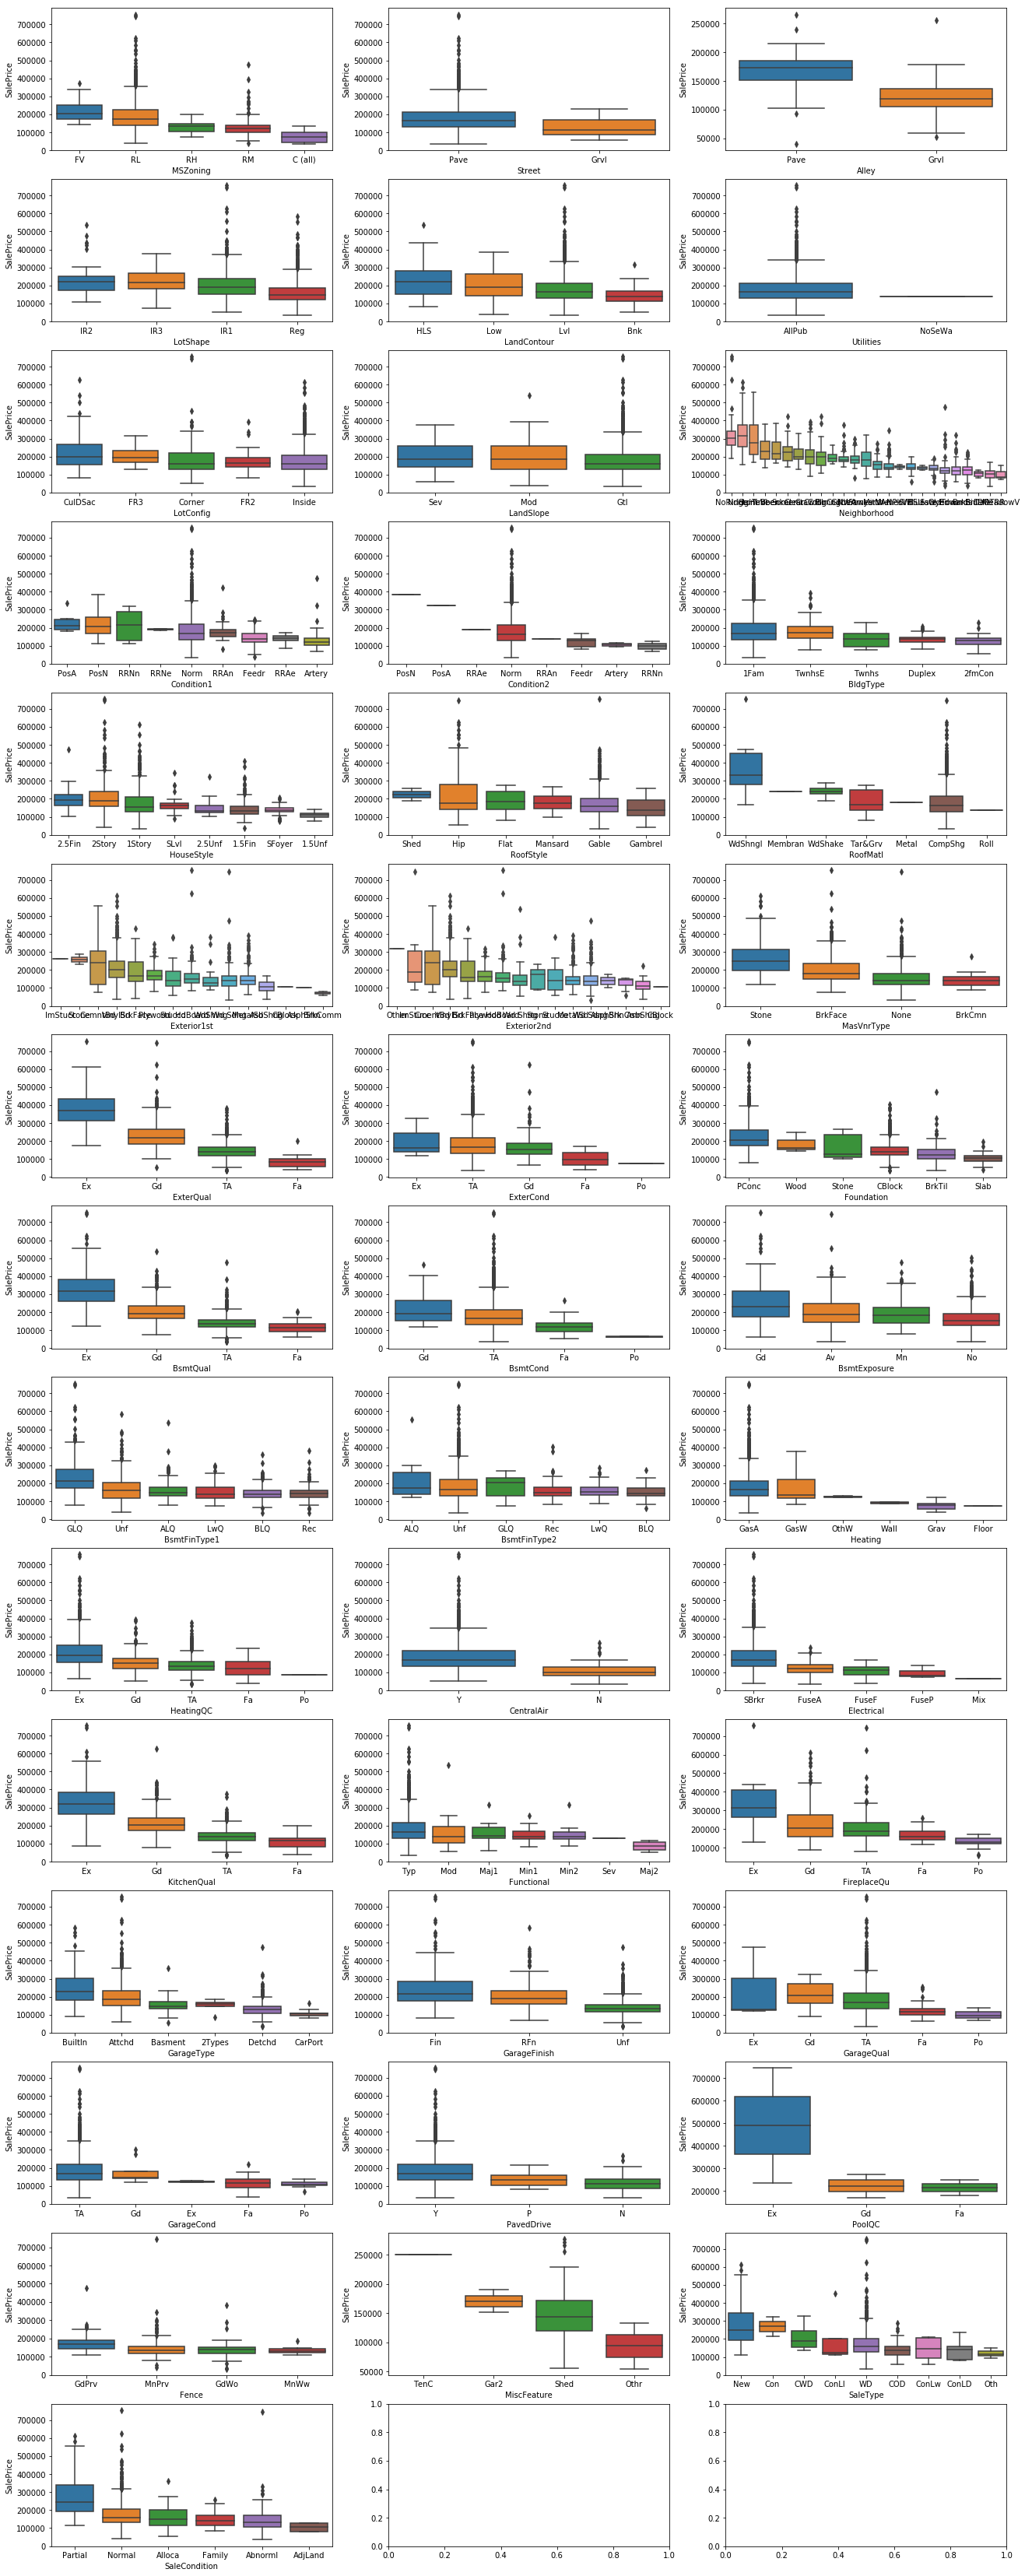

In [9]:
#taking a look at the object features by using a boxplot against the SalePrice
obj_cols = htrain.select_dtypes(include = ["object"])

fig, axes = plt.subplots(ncols=3, nrows= 15,figsize=(22,60))

for i, c in enumerate(obj_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    order = htrain.groupby(c)['SalePrice'].mean().fillna(0).sort_values()[::-1].index
    sns.boxplot(x=htrain[c], y=htrain['SalePrice'], ax = ax_curr, order=order)
plt.show()

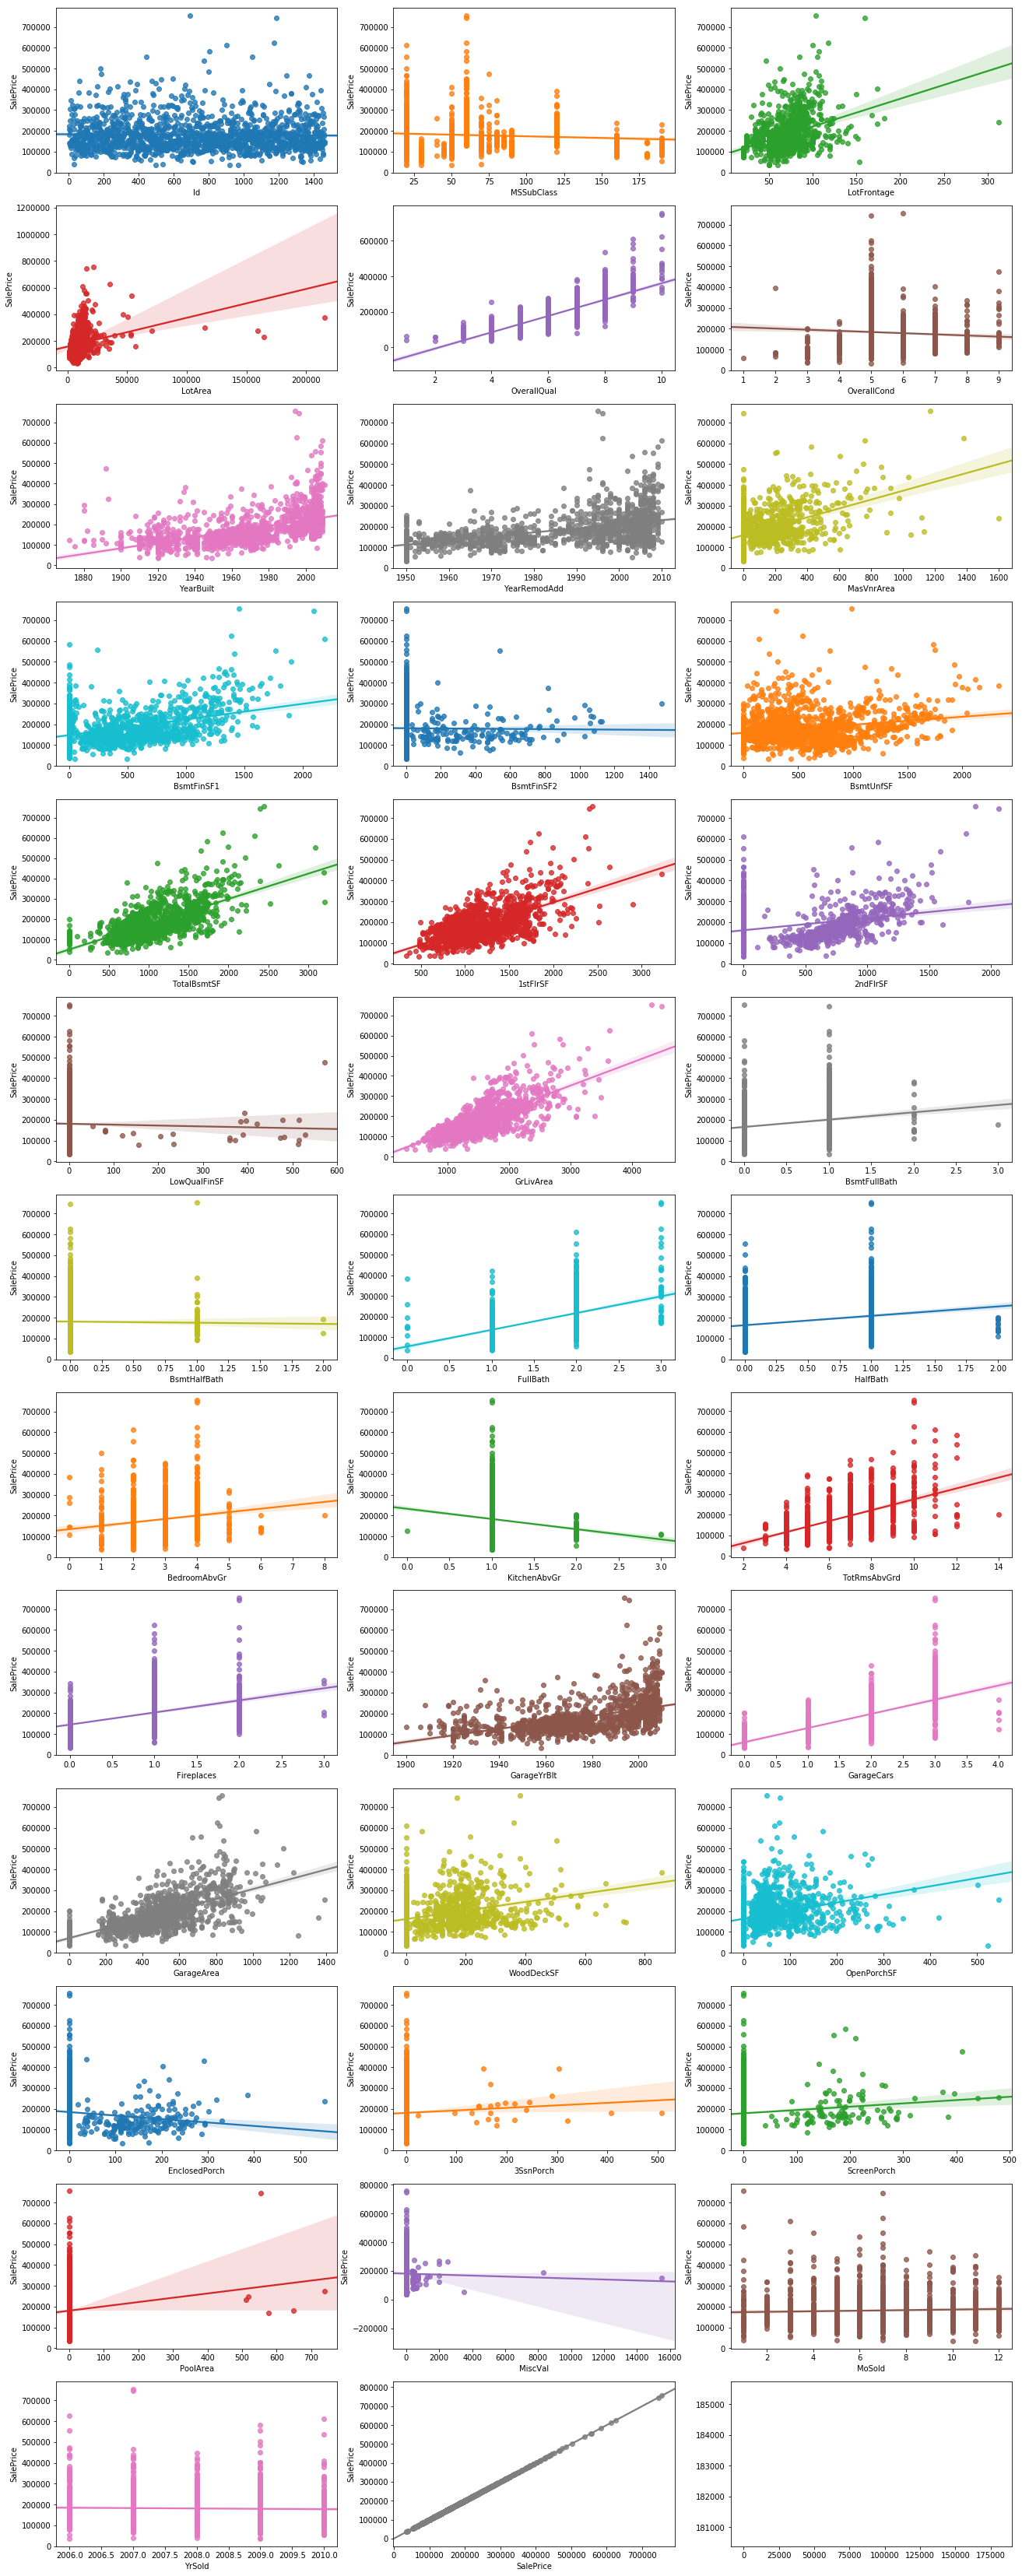

In [ ]:
#taking a look at numeric features by using a scatterplot against the SalePrice
num_cols = htrain._get_numeric_data()

fig, axes = plt.subplots(ncols=3, nrows= 13,figsize=(22,60))

for i, c in enumerate(num_cols):
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.regplot(x=htrain[c], y=htrain['SalePrice'], ax = ax_curr)
plt.show()


In [ ]:
#correlation matrix of all numeric features
corr = House_trainNew.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="YlGnBu")

**Starting the Cleaning Process**

In [8]:
#saving SalePrice from htrain as y_train. 
#dropping Saleprice data to combine test and train to clean both in the same way.
#new data frame : all_data#looking at missing values in data 
ntrain = htrain.shape[0]
ntest = htest.shape[0]
y_train = htrain.SalePrice.values
all_data = pd.concat((htrain, htest)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))
all_data.head()
ntrain

all_data size is : (2917, 80)


1458

In [9]:
#looking at missing values in all_data 
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
PoolQC,2908
MiscFeature,2812
Alley,2719
Fence,2346
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageFinish,159
GarageYrBlt,159
GarageCond,159


Changing NA's to their actual value None

In [10]:
#fill categorical variables that have Na as category
#we know that NA here is no missing data but an actual feature -> description of the data available on Kaggle
col_missings = ["Alley", "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1", 
"BsmtFinType2", "FireplaceQu", "GarageType","GarageFinish","GarageQual",
"GarageCond", "PoolQC", "Fence","MiscFeature"]
all_data[col_missings] = all_data[col_missings].fillna(value = "None")
print("all_data size is : {}".format(all_data.shape))
all_data.head()

all_data size is : (2917, 80)


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [11]:
#check missing data after imputing "NA" as None
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
LotFrontage,486
GarageYrBlt,159
MasVnrType,24
MasVnrArea,23
MSZoning,4
Functional,2
Utilities,2
BsmtFullBath,2
BsmtHalfBath,2
TotalBsmtSF,1


In [12]:
#near zero; deleting features that have zero or near to zero impact on SalePrice
all_data = all_data.drop(["Street","3SsnPorch","Id", "Utilities","Condition2", "RoofMatl", "PoolQC","LowQualFinSF", "PoolArea", "MiscVal"],axis=1)
all_data.shape

(2917, 70)

In [13]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [14]:
#fill in missing value for GarageYr
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0)
all_data.loc[all_data['GarageYrBlt']>0, 'GarageYrBlt']=all_data['GarageYrBlt']-all_data['YearBuilt']
all_data.shape

(2917, 70)

In [15]:
all_data.loc[all_data['GarageYrBlt']==2207,'GarageYrBlt']=2007

In [16]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [17]:
for col in ('BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','BsmtFinSF1', 'BsmtFinSF2'):
    all_data[col] = all_data[col].fillna(0)

In [18]:
for col in ('GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [19]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [20]:
#filling missing data with most commen value
for col in ('Exterior1st', 'Exterior2nd', 'Electrical', 'KitchenQual', 'SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

#all_data[] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
#all_data[] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
#all_data[] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
#all_data[] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
#all_data[] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [21]:
#check missing data after imputing "NA" as None
missing = pd.DataFrame(all_data.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0]

,0
LotFrontage,486


In [22]:
#alternative to knn. grouping by neighborhood. same neighborhood similar lotfrontage.

#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Convert Quality Data into categorical numbers

In [24]:
clean_data=all_data.copy()

In [25]:
#convert categorical ordinal columns
col_ordinal = clean_data[['ExterQual', 'ExterCond', 'BsmtQual',"BsmtCond",
           "BsmtExposure", "HeatingQC",
          "KitchenQual", "FireplaceQu", "GarageType","GarageQual",
          "GarageCond"]]

ord_dic1 = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':2, 'Po':1,'None':0}
for col in col_ordinal:
    clean_data[col] = clean_data[col].map(lambda x: ord_dic1.get(x, 0))

#fix LotShape
ord_dic2 = {'Reg': 4, 'IR1': 3, 'IR2':2, 'IR3':1}
clean_data.LotShape = clean_data.LotShape.map(lambda x: ord_dic2.get(x, 0))

#fix BsmntExposure
ord_dic3 = {"Gd":4 ,'Av':3, 'Mn':2, 'No':1, 'None':0}
clean_data.BsmtExposure = clean_data.BsmtExposure.map(lambda x: ord_dic3.get(x, 0))

#fix GarageFinish
ord_dic4 = {'Fin':3,'RFn':2,'Unf':1,'None':0}
clean_data.GarageFinish = clean_data.GarageFinish.map(lambda x: ord_dic4.get(x, 0))

#fix Paved
ord_dic5 ={'Y':3,'P':2,"N":1}
clean_data.PavedDrive = clean_data.PavedDrive.map(lambda x: ord_dic5.get(x, 0))


#fix Electrical
ord_dic6={'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1}
clean_data.Electrical = clean_data.Electrical.map(lambda x: ord_dic6.get(x, 0))

#fix BsmntFinType1
ord_dic7 = {"GLQ": 6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, "None":0}
clean_data.BsmtFinType1 = clean_data.BsmtFinType1.map(lambda x: ord_dic7.get(x, 0))

#fix Fence
ord_dic8={'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0}
clean_data.Fence = clean_data.Fence.map(lambda x: ord_dic8.get(x, 0))

#fix Functional
ord_dic9={"Typ":8 ,"Min1":7 , "Min2": 6, "Mod": 5, "Maj1":4 , "Maj2": 3, "Sev": 2, "Sal":1 }
clean_data.Functional = clean_data.Functional.map(lambda x: ord_dic9.get(x, 0))
clean_data.shape

(2917, 70)

In [26]:
clean_data.shape

(2917, 70)

In [27]:
print(clean_data.loc[:, clean_data.dtypes == object].columns.values)

print(clean_data.loc[:, clean_data.dtypes != object].columns.values)

['Alley' 'BldgType' 'BsmtFinType2' 'CentralAir' 'Condition1' 'Exterior1st'
 'Exterior2nd' 'Foundation' 'Heating' 'HouseStyle' 'LandContour'
 'LandSlope' 'LotConfig' 'MSZoning' 'MasVnrType' 'MiscFeature'
 'Neighborhood' 'RoofStyle' 'SaleCondition' 'SaleType']
['1stFlrSF' '2ndFlrSF' 'BedroomAbvGr' 'BsmtCond' 'BsmtExposure'
 'BsmtFinSF1' 'BsmtFinSF2' 'BsmtFinType1' 'BsmtFullBath' 'BsmtHalfBath'
 'BsmtQual' 'BsmtUnfSF' 'Electrical' 'EnclosedPorch' 'ExterCond'
 'ExterQual' 'Fence' 'FireplaceQu' 'Fireplaces' 'FullBath' 'Functional'
 'GarageArea' 'GarageCars' 'GarageCond' 'GarageFinish' 'GarageQual'
 'GarageType' 'GarageYrBlt' 'GrLivArea' 'HalfBath' 'HeatingQC'
 'KitchenAbvGr' 'KitchenQual' 'LotArea' 'LotFrontage' 'LotShape'
 'MSSubClass' 'MasVnrArea' 'MoSold' 'OpenPorchSF' 'OverallCond'
 'OverallQual' 'PavedDrive' 'ScreenPorch' 'TotRmsAbvGrd' 'TotalBsmtSF'
 'WoodDeckSF' 'YearBuilt' 'YearRemodAdd' 'YrSold']


In [28]:
#main goal is to get the overall SF of each house. 
#add all Basement's SF to get new SF and match with existing  TotalBsmtSF

x=[]
clean_data['TotalBsmtSF_new'] = clean_data['BsmtFinSF1'] + clean_data['BsmtFinSF2'] + clean_data['BsmtUnfSF']
x=(clean_data['TotalBsmtSF_new'] != clean_data['TotalBsmtSF'])

x[x==True]

Series([], dtype: bool)

In [29]:
#as only one differs that too in test, we delete the redundant basement columns and new column
clean_data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF_new'], axis=1, inplace=True)

In [30]:
#get total square footage of house
clean_data['TotalSF'] = all_data['TotalBsmtSF'] + clean_data['1stFlrSF'] + clean_data['2ndFlrSF']
clean_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)
clean_data.head()

,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF
0,None,3,1Fam,3,0,6,Unf,1.0,0.0,4,...,Gable,Normal,WD,0,8,0,2003,2003,2008,2566.0
1,None,3,1Fam,3,0,5,Unf,0.0,1.0,4,...,Gable,Normal,WD,0,6,298,1976,1976,2007,2524.0
2,None,3,1Fam,3,0,6,Unf,1.0,0.0,4,...,Gable,Normal,WD,0,6,0,2001,2002,2008,2706.0
3,None,3,1Fam,4,0,5,Unf,1.0,0.0,3,...,Gable,Abnorml,WD,0,7,0,1915,1970,2006,2473.0
4,None,4,1Fam,3,0,6,Unf,1.0,0.0,4,...,Gable,Normal,WD,0,9,192,2000,2000,2008,3343.0


In [31]:
all_dummy = pd.get_dummies(clean_data, drop_first = True)
dum2 = all_dummy.copy()

In [32]:
#alternative to knn. grouping by neighborhood. same neighborhood similar lotfrontage.

#all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
from fancyimpute  import KNN
all_dummy[['LotFrontage']] = pd.DataFrame(KNN(k=54).complete(all_dummy[['LotFrontage']])).as_matrix()

Using TensorFlow backend.


Imputing row 1/2917 with 0 missing, elapsed time: 1.086
Imputing row 101/2917 with 1 missing, elapsed time: 1.087
Imputing row 201/2917 with 0 missing, elapsed time: 1.087
Imputing row 301/2917 with 0 missing, elapsed time: 1.088
Imputing row 401/2917 with 0 missing, elapsed time: 1.089
Imputing row 501/2917 with 0 missing, elapsed time: 1.090
Imputing row 601/2917 with 0 missing, elapsed time: 1.090
Imputing row 701/2917 with 0 missing, elapsed time: 1.091
Imputing row 801/2917 with 0 missing, elapsed time: 1.092
Imputing row 901/2917 with 0 missing, elapsed time: 1.093
Imputing row 1001/2917 with 0 missing, elapsed time: 1.094
Imputing row 1101/2917 with 0 missing, elapsed time: 1.094
Imputing row 1201/2917 with 0 missing, elapsed time: 1.095
Imputing row 1301/2917 with 0 missing, elapsed time: 1.096
Imputing row 1401/2917 with 0 missing, elapsed time: 1.097
Imputing row 1501/2917 with 0 missing, elapsed time: 1.098
Imputing row 1601/2917 with 0 missing, elapsed time: 1.098
Imputing 

In [34]:
#dum2[['LotFrontage']] = pd.DataFrame(KNN(k=54).complete(dum2[['LotFrontage']])).as_matrix()

In [35]:
#fill in missing value for GarageYr
all_dummy['GarageYrBlt'] = all_dummy['GarageYrBlt'].fillna(0)
all_dummy.loc[all_dummy['GarageYrBlt']>0, 'GarageYrBlt']=all_dummy['GarageYrBlt']-all_dummy['YearBuilt']
all_dummy.shape

(2917, 174)

In [36]:
missing = pd.DataFrame(all_dummy.isnull().sum().sort_values(ascending=False))
missing[missing[0]!=0].index

Index([], dtype='object')

** Splitting back to test and train**

In [37]:
#ntrain = htrain.shape[0]
#ntest = htest.shape[0]
#y_train = htrain.SalePrice.values
new_train = all_dummy[:ntrain]
new_test = all_dummy[:ntest]
y_train =pd.DataFrame(y_train)
y_train.columns = ["SalePrice"]

new_train = new_train.merge(y_train, how = "inner", right_index = True, left_index = True)
print(new_test.shape)
print(new_train.shape)

(1459, 174)
(1458, 175)


In [38]:
#saving then new data frames as csv
new_train.to_csv('NewTrain.csv', sep=',')
new_test.to_csv('NewTest.csv', sep=',')